## Importing Packages

In [1]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [2]:
year = 2023
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (304.12 MB) C:\Users\odath\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', 

## Loading and Preparing Lap Data

In [3]:
laps = session.laps

laps = laps[[
    'Driver', 'LapNumber', 'LapTime',
    'Compound', 'TyreLife', 'Stint', 'Team'
]].dropna()

laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Driver,LapNumber,LapTime,Compound,TyreLife,Stint,Team,LapTimeSeconds
0,VER,1.0,0 days 00:01:37.167000,MEDIUM,1.0,1.0,Red Bull Racing,97.167
1,VER,2.0,0 days 00:01:33.433000,MEDIUM,2.0,1.0,Red Bull Racing,93.433
2,VER,3.0,0 days 00:01:32.730000,MEDIUM,3.0,1.0,Red Bull Racing,92.730
3,VER,4.0,0 days 00:01:32.780000,MEDIUM,4.0,1.0,Red Bull Racing,92.780
4,VER,5.0,0 days 00:01:32.582000,MEDIUM,5.0,1.0,Red Bull Racing,92.582


## Compound color map

In [4]:
COMPOUND_COLORS = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFD700',
    'HARD': '#000000',
    'INTERMEDIATE': '#39B54A',
    'WET': '#0077FF'
}

## Race Statergy Comparison between different drivers

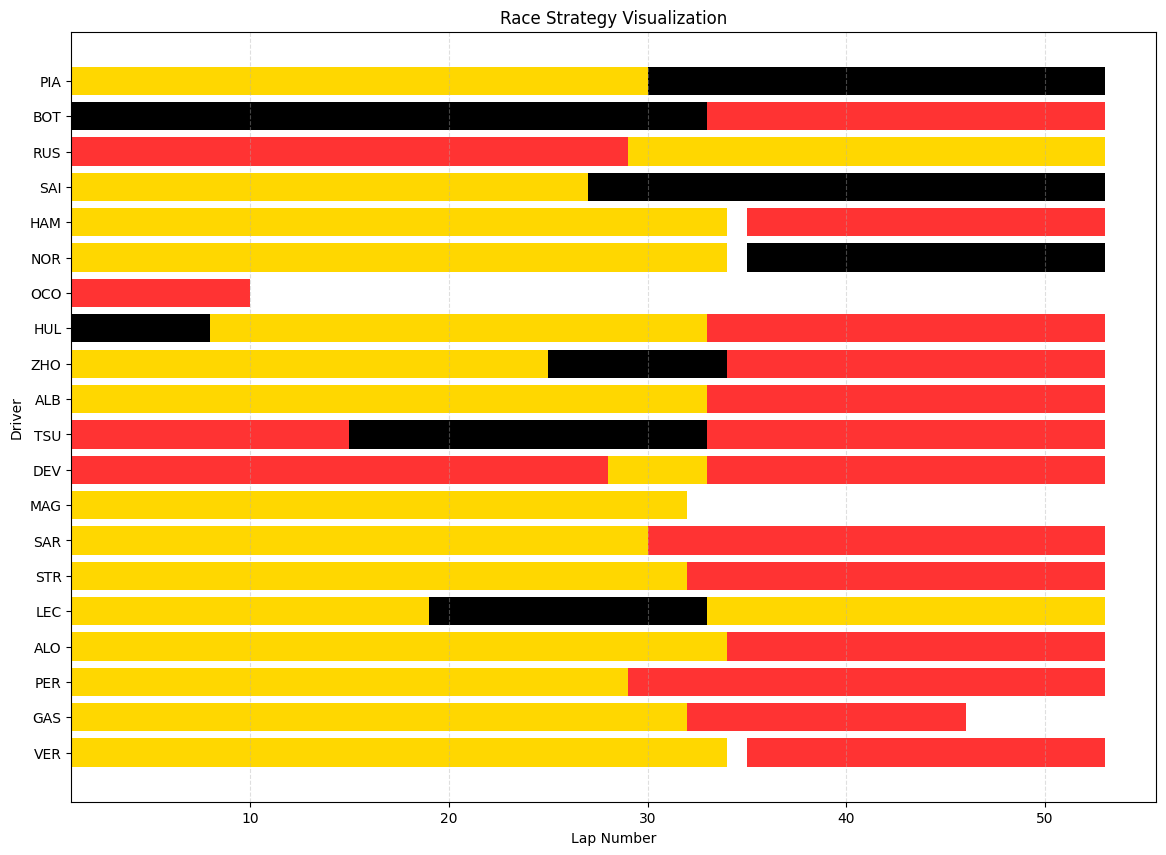

In [5]:
drivers = laps['Driver'].unique()

fig, ax = plt.subplots(figsize=(14,10))

for driver in drivers:
    stints = laps[laps['Driver'] == driver].groupby('Stint')
    
    for stint, data in stints:
        compound = data['Compound'].iloc[0]
        ax.barh(
            driver,
            len(data),
            left=data['LapNumber'].min(),
            color=COMPOUND_COLORS.get(compound, '#AAAAAA')
        )

ax.set_xlabel("Lap Number")
ax.set_ylabel("Driver")
ax.set_title("Race Strategy Visualization")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
